In [1]:
import numpy as np
import matplotlib.pyplot as plt

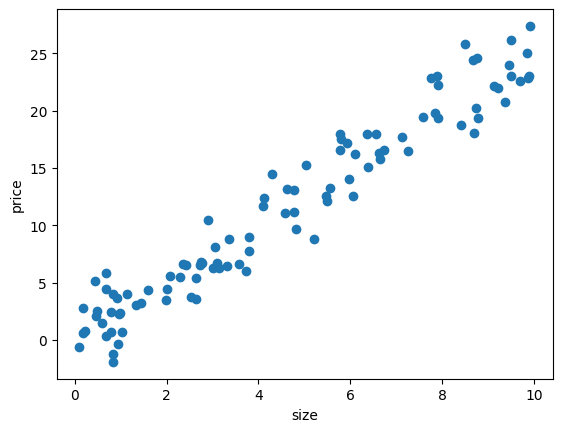

In [4]:
# random points

x = np.random.rand(100, 1) * 10
y = 2.5 * x + np.random.randn(100, 1) * 2

plt.scatter(x, y)
plt.xlabel("size")
plt.ylabel("price")
plt.show()

In [6]:
# Linear regression

# fwb(x) = wx+b

# w = slope
# b = bias
# x = input feature
# fwb(x) = models prediction

# j cost function (error squared function)

# J(w,b) = (1/2m) ​ ∑( fw,b(x(i)) − y(i))^2

In [7]:
# Linear regression

def compute_cost(x, y, w, b):
    totalCost = 0

    m = len(x) # length of x input features

    for i in range(m):
        fwb = (w * x[i]) + b
        totalCost += ((fwb - y[i]) ** 2)

    totalCost *= (1 / (2 * m))

    return totalCost
        

In [10]:
# Gradient Descent for linear regression

# Gradient Descent tries to find the w and b that minimize J(w,b)
#
# Partial derivatives:
#   dJ/dw = (1/m) * Σ (f_wb(x[i]) - y[i]) * x[i]
#   dJ/db = (1/m) * Σ (f_wb(x[i]) - y[i])
#
# Update rule:
#   w := w - α * dJ/dw
#   b := b - α * dJ/db
#
# α = learning rate (controls how big each step is)

In [17]:
#for computing the derivatives of jcost, both for w and b
def compute_gradient(x, y, w, b):
    dj_dw = 0
    dj_db = 0

    m = len(x) # length of x input features

    for i in range(m):
        fwb = (w * x[i]) + b

        dj_dw += (fwb - y[i]) * x[i]
        dj_db += (fwb - y[i])

    dj_dw *= (1/m)
    dj_db *= (1/m)

    return dj_dw, dj_db

# actual gradient descent algorithm
def gradient_descent(x, y, w, b, alpha, num_inters):
    cost_history = [] # stores the cost per iteration for visualization

    for i in range(num_inters):
        #compute the derivatives of cost first
        dj_dw, dj_db = compute_gradient(x, y, w, b)
    
        # then update the w and b
        w -= alpha * dj_dw
        b -= alpha * dj_db
    
        #record cost for visualization
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)

    return w, b, cost_history

In [31]:
# Training the model :)

w = 0
b = 0

alpha = 0.01
iterations = 1000

# run gradient descent first to get the right w and b
wFinal, bFinal, costHistory = gradient_descent(x, y, w, b, alpha, iterations)

print(f"final w: {wFinal} | final b: {bFinal}")


final w: [2.50622921] | final b: [0.00063608]


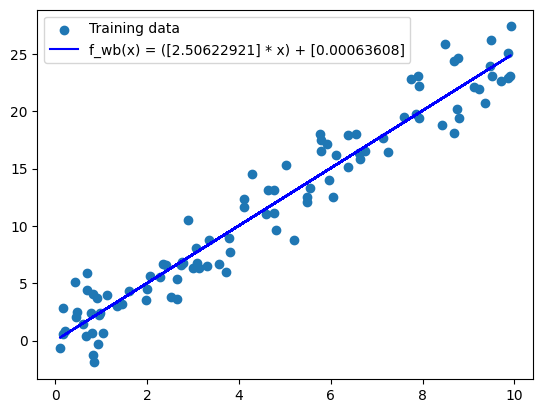

In [32]:
#plot training data + learned line

lrLine = (wFinal * x + bFinal)

plt.scatter(x, y, label="Training data")
plt.plot(x,lrLine, color="blue", label=f"f_wb(x) = ({wFinal} * x) + {bFinal}")
plt.legend()
plt.show()

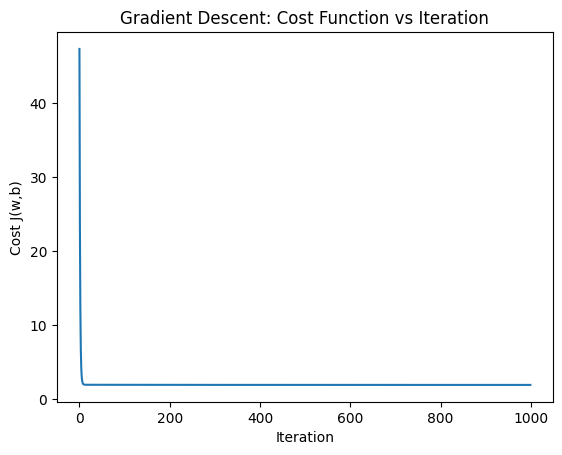

In [33]:
# Plot cost vs. iteration (how Gradient Descent learns)
plt.plot(costHistory)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost Function vs Iteration")
plt.show()

<h1>MULTIPLE FEATURE LINEAR REGRESSION</h1>

fwb(x) = w1x1 + w2x2 + ... + wnxn + b

In [6]:
# training dataset for multi

# number of training examples
m = 100  

# features
np.random.seed(1)
size = np.random.rand(m, 1) * 200          # 0–200 sqm
bedrooms = np.random.randint(1, 6, (m, 1)) # 1–5 bedrooms
age = np.random.rand(m, 1) * 30            # 0–30 years

# combine features
x = np.hstack([size, bedrooms, age]) # 3 features

# actual function (ground truth)
# y = 50k + (1000 * size) + (10k * bedrooms) - (500 * age) + noise
y = 50000 + 1000*size + 10000*bedrooms - 500*age + np.random.randn(m, 1)*10000


In [7]:
# vectorized version of fwb(x) = w1x1 + w2x2 + ... + wnxn + b
def predict(x, w, b):
    return np.dot(x, w) + b

def compute_cost_multivar(x, y, w, b):
    m = x.shape[0] # gets the size of the training dataset

    cost = np.sum((predict(x, w, b) - y) ** 2) * (1 / (2 * m)) # j cost formula

    return cost


In [19]:
#gradient descent

# get derivatives
def compute_gradient_multivar(x, y, w, b):
    # m = row size (number of datapoints) | n = column size (number of features)
    m, n = x.shape

    fwb = predict(x, w, b)

    #formula:
    #   dJ/dw = (1/m) * Σ (f_wb(x[i]) - y[i]) * x[i]
    #   dJ/db = (1/m) * Σ (f_wb(x[i]) - y[i])
    # same formula but the fwb(x) is different
    # fwb(x) = w1x1 + w2x2 + ... wnxn + b for the multiple feature linear regression
    
    dj_dw = (1 / m) * np.dot(x.T, (fwb - y)) # i have NO idea why use the transposed matrix x
    dj_db = (1 / m) * np.sum(fwb - y)

    return dj_dw, dj_db

def gradient_descent_multivar(x, y, w, b, alpha, num_iters):
    w = w.copy() # for safety measures or something

    history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_multivar(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        # for history (optional to add)
        cost = compute_cost_multivar(X, y, w, b)
        history.append(cost)

    return w, b, history
    

In [56]:
# training

# feature scaling before training it
xMean = np.mean(x, axis = 0)
xStd = np.std(x, axis = 0)
xNorm = (x - xMean) / xStd # z score normalization

# parameters
w = np.zeros((x.shape[1], 1))
b = 0
alpha = 0.00001
iterations = 2500

w_final, b_final, j_hist = gradient_descent_multivar(xNorm, y, w, b, alpha, iterations)

In [57]:
print("\nFinal parameters:")
print("w =", w_final)
print("b =", b_final)
print(f"Final cost = {compute_cost_multivar(xNorm, y, w_final, b_final):.2f}")



Final parameters:
w = [[1479.06749477]
 [ 467.81360716]
 [-152.89993482]]
b = 4205.408726101264
Final cost = 15657955272.70


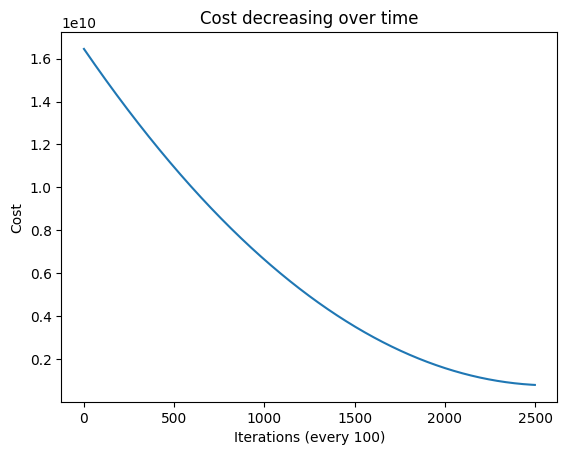

In [58]:
plt.plot(j_hist)
plt.xlabel("Iterations (every 100)")
plt.ylabel("Cost")
plt.title("Cost decreasing over time")
plt.show()


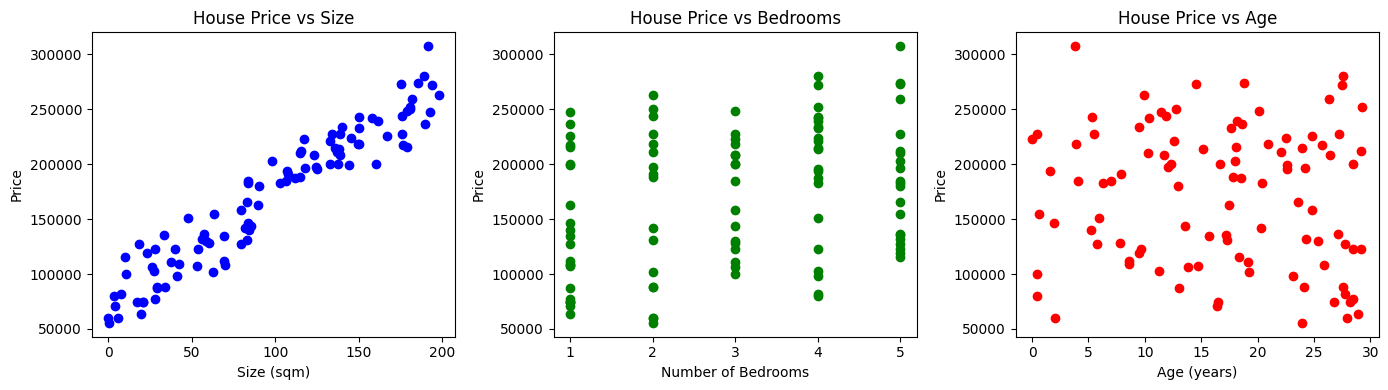

In [61]:
# Scatter plots for each feature
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.scatter(size, y, color='blue')
plt.xlabel("Size (sqm)")
plt.ylabel("Price")
plt.title("House Price vs Size")

plt.subplot(1,3,2)
plt.scatter(bedrooms, y, color='green')
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("House Price vs Bedrooms")

plt.subplot(1,3,3)
plt.scatter(age, y, color='red')
plt.xlabel("Age (years)")
plt.ylabel("Price")
plt.title("House Price vs Age")

plt.tight_layout()
plt.show()

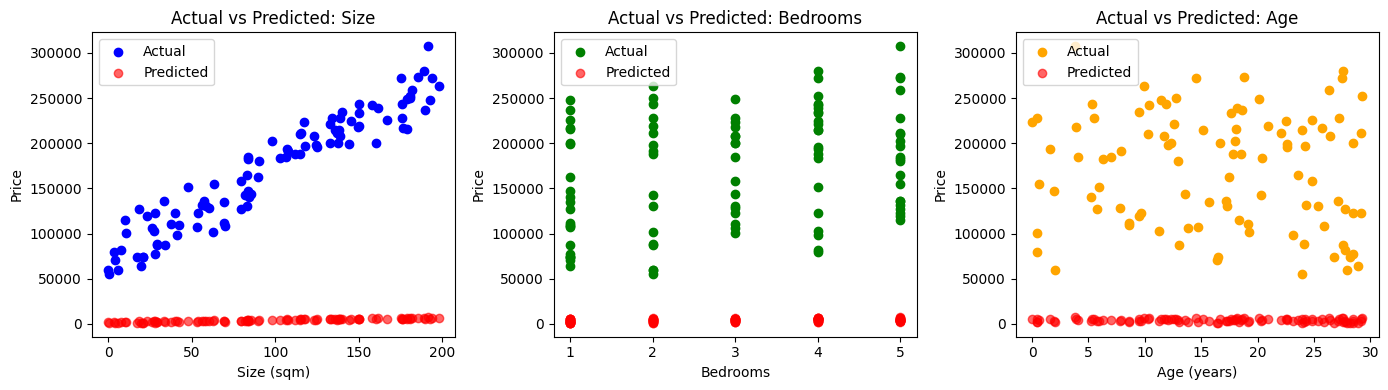

In [68]:
# Add bias term (if not already added)
x_with_bias = np.hstack([np.ones((m,1)), xNorm])

# Predictions using your trained theta
y_pred = np.dot(xNorm, w_final) + b_final


plt.figure(figsize=(14,4))

# Plot vs Size
plt.subplot(1,3,1)
plt.scatter(size, y, color='blue', label='Actual')
plt.scatter(size, y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel("Size (sqm)")
plt.ylabel("Price")
plt.title("Actual vs Predicted: Size")
plt.legend()

# Plot vs Bedrooms
plt.subplot(1,3,2)
plt.scatter(bedrooms, y, color='green', label='Actual')
plt.scatter(bedrooms, y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Actual vs Predicted: Bedrooms")
plt.legend()

# Plot vs Age
plt.subplot(1,3,3)
plt.scatter(age, y, color='orange', label='Actual')
plt.scatter(age, y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel("Age (years)")
plt.ylabel("Price")
plt.title("Actual vs Predicted: Age")
plt.legend()

plt.tight_layout()
plt.show()


You cannot graph linear regressions with 3 or more features unfortunately

In [76]:
x_new = np.array([[70, 2, 10]])  # size, bedrooms, age
x_new_norm = (x_new - xMean) / xStd
pred = predict(x_new_norm, w_final, b_final)

print(f"Predicted house price: ₱{pred[0,0]:,.2f}")


Predicted house price: ₱3,317.62


<h1> POLYNOMIAL LINEAR REGRESSION </h1>

<h2> A polynomial is just an equation that combines powers of a variable.</h2>

<h3> example: y = 2x^2 + 3x + 5

2x^2 - Quadratic term
3x   - Linear term
5    - Constant term
</h3>

<h2> Polynomials can have any degree: </h2>

<h3>
Degree 1: y = ax + b (straight line)

Degree 2: y = ax^2 + bx + c  (U-shaped or inverted U (curve))

Degree 3: y = ax^3 + bx^2 + cx + d (S-shaped curve)
</h3>

<h2> Polynomial linear regression is still linear regression — but instead of feeding the model just x,
you also feed powers of x (like x^2, x^3) as extra features </h2>

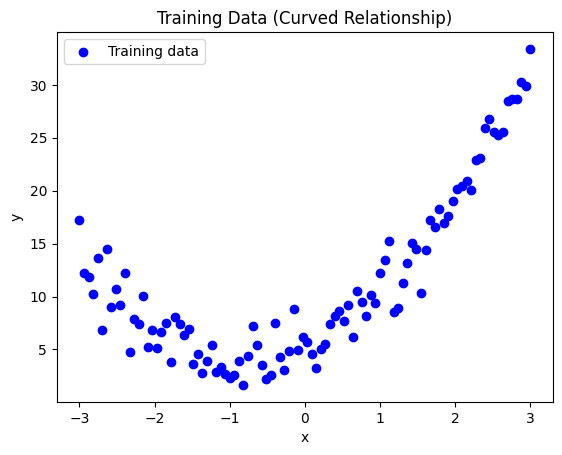

In [1]:
# training data

import numpy as np
import matplotlib.pyplot as plt

# Generate training data
np.random.seed(1)
m = 100  # number of examples

x = np.linspace(-3, 3, m).reshape(-1, 1)  # feature (from -3 to 3)
y = 2 * x**2 + 3 * x + 5 + np.random.randn(m, 1) * 2  # quadratic + noise

# Visualize the data
plt.scatter(x, y, color='blue', label='Training data')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data (Curved Relationship)")
plt.legend()
plt.show()


In [8]:
# create polynomial features manually 
# (some libraries already have automated version of this, but since im learning, ill be implementing from scratch)

degree = 2

x_poly = np.hstack([(x ** i) for i in range(1, degree + 1)])
# by the way, both x1 and x1(^2) are both combined in this variable

# ------------------------------------------------------------------------------------------------------------------------------

# NOTE: this is a extra feature
# if you have one feature, now there will be two if you use polynomial linear regression
# remember: ax^2 + bx + c
# where ax^2 is the squared feature and bx is the non modified feature
# theyre different, dont use the same x feature for it

# itll look like this: fwb(x) = w1x1 + w2x1(^2) + b

# basically, its a duplicated version of a x feature BUT you square it and instead of using the same w, you have to use a new one
# (more example for that in multi feature LR)

# IN Multiple feature linear regression, same thing, it doubles
# example: fwb(x) = w1x1 + w2x2 + w3x3 + b (this is non polynomial multiple feature linear regression) (that was pretty long)
# now with polynomials: fwb(x) w1x1 + w2x2 + w3x3 + w4x1(^2) + w5x2(^2) + w6x3(^2) + b

# see that x features duped and squared, the w (weights) didnt get reused rather, a new one is used
# its quite a mind fucker (for me atleast)

# ------------------------------------------------------------------------------------------------------------------------------

# only uncomment this when you want to see the values of the squared x features
# its too long so im gonna comment it
# print(x_poly) 

In [9]:
# model
def predict(x, w, b):
    return np.dot(x, w) + b

def compute_cost(x, y, w, b):
    m = len(y)

    fwb = predict(x, w, b)
    cost = (1 / (2 * m)) * np.sum((fwb - y) ** 2)
    
    return cost

In [12]:
# gradient descent

def compute_gradient(x, y, w, b):
    m = len(y)

    fwb = predict(x, w, b)
    
    dj_dw = (1 / m) * np.dot(x.T, (fwb - y))
    dj_db = (1 / m) * np.sum(fwb - y)

    return dj_dw, dj_db

def gradient_descent(x, y, w, b, alpha, iterations):
    w = w.copy()
    
    cost_history = []
    
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)

    return w, b, cost_history

# why did i even retyped these when i could just reused the functions before

In [20]:
# training
w = np.zeros((degree, 1)) # w1 and w2
b = 0
alpha = 0.01
iterations = 1000

w_final, b_final, cost_history = gradient_descent(x_poly, y, w, b, alpha, iterations)

In [19]:
print("\nFinal parameters:")
print("w =", w_final)
print("b =", b_final)
print(f"Final cost = {cost_history[-1]:.4f}")


Final parameters:
w = [[3.11028155]
 [1.9668255 ]]
b = 5.19531843649236
Final cost = 1.5417


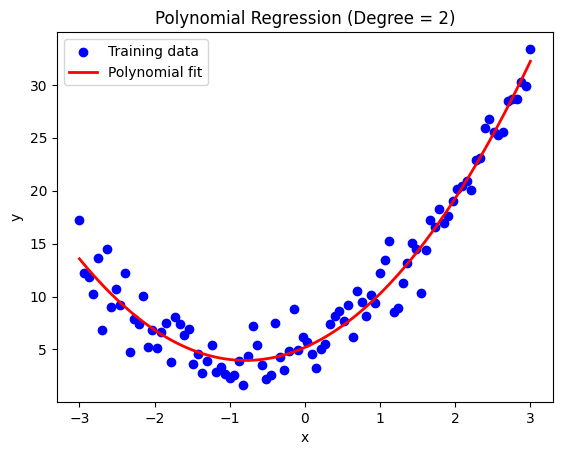

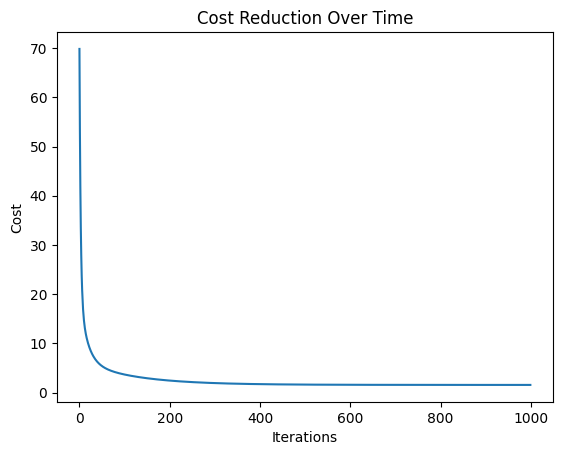

In [18]:
# Predictions
y_pred = np.dot(x_poly, w_final) + b_final

# Sort for a smooth curve (optional)
sorted_indices = np.argsort(x.flatten())
x_sorted = x[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot
plt.scatter(x, y, color='blue', label='Training data')
plt.plot(x_sorted, y_pred_sorted, color='red', linewidth=2, label='Polynomial fit')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression (Degree = 2)")
plt.legend()
plt.show()

# Plot cost over iterations
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Time")
plt.show()


<h1> with multiple features</h1>

In [41]:
# features
np.random.seed(1)
size = np.random.rand(m, 1) * 200          # 0–200 sqm
bedrooms = np.random.randint(1, 6, (m, 1)) # 1–5 bedrooms
age = np.random.rand(m, 1) * 30            # 0–30 years old

# combine features into one matrix X
x = np.hstack((size, bedrooms, age))

# true weights (for generating data only)
theta_true = np.array([[3000], [50000], [-1000]])  
bias = 20000

# generate target values with some noise
noise = np.random.randn(m, 1) * 10000
y = x @ theta_true + bias + noise

In [42]:
degree = 3

x_poly = np.hstack([x ** i for i in range(1, degree + 1)])

print(x_poly)

[[8.34044009e+01 5.00000000e+00 6.30522030e+00 6.95629410e+03
  2.50000000e+01 3.97558030e+01 5.80185542e+05 1.25000000e+02
  2.50669096e+02]
 [1.44064899e+02 1.00000000e+00 2.25826666e+01 2.07546950e+04
  1.00000000e+00 5.09976831e+02 2.99002304e+06 1.00000000e+00
  1.15166368e+04]
 [2.28749635e-02 2.00000000e+00 1.99609444e+00 5.23263954e-04
  4.00000000e+00 3.98439302e+00 1.19696438e-05 8.00000000e+00
  7.95322475e+00]
 [6.04665145e+01 3.00000000e+00 7.80945296e+00 3.65619938e+03
  9.00000000e+00 6.09875555e+01 2.21077633e+05 2.70000000e+01
  4.76279446e+02]
 [2.93511782e+01 2.00000000e+00 2.41426369e+01 8.61491660e+02
  4.00000000e+00 5.82866917e+02 2.52857952e+04 8.00000000e+00
  1.40719443e+04]
 [1.84677190e+01 5.00000000e+00 5.80302848e+00 3.41056643e+02
  2.50000000e+01 3.36751395e+01 6.29853824e+03 1.25000000e+02
  1.95417794e+02]
 [3.72520423e+01 3.00000000e+00 1.91838264e+01 1.38771465e+03
  9.00000000e+00 3.68019196e+02 5.16952049e+04 2.70000000e+01
  7.06001638e+03]
 [6.91

In [43]:
# normalize
x_mean = np.mean(x_poly, axis = 0)
x_std = np.std(x_poly, axis = 0)
x_norm = (x_poly - x_mean) / x_std

In [44]:
w = np.zeros((x_poly.shape[1], 1))
b = 0
alpha = 0.01
iteration = 1000

w_final, b_final, cost_history = gradient_descent(x_norm, y, w, b, alpha, iteration)
# print(x_norm.shape)
# print(w.shape)

In [45]:
print("\nFinal parameters:")
print("w =", w_final)
print("b =", b_final)
print(f"Final cost = {cost_history[-1]:.4f}")


Final parameters:
w = [[116526.43259598]
 [ 45330.70497675]
 [ -2644.287119  ]
 [ 51579.00820308]
 [ 23392.67660159]
 [ -4056.14037655]
 [  7255.94535191]
 [  5832.42935107]
 [ -5245.10635087]]
b = 446748.62859574537
Final cost = 198414204.0840


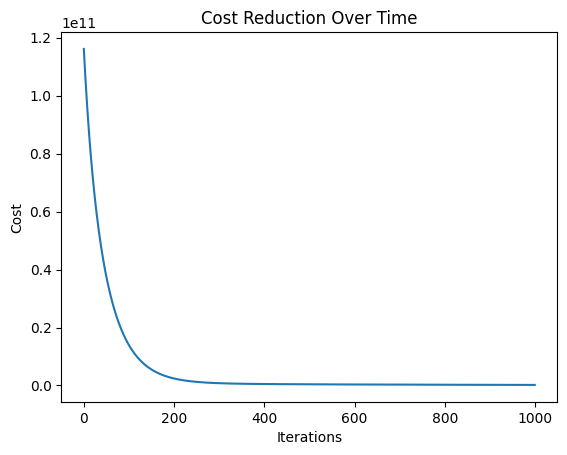

In [46]:
# Plot cost over iterations
plt.plot(range(iteration), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Time")
plt.show()

i cannot check whether this underfits or overfits since i cant graph datas with multiple feature